https://github.com/lyhue1991/eat_tensorflow2_in_30_days/tree/master/english

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from numpy import argmax
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.17.1


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ml_datasets/CreditCardFraud.csv')

In [ ]:
data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [ ]:
data.shape

(1000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
data['class'] = data['class'].map({'good': 0, 'bad': 1})
data['class'].value_counts()

,count
class,
0,700
1,300


In [ ]:
data.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
## For this demo purpose, we'l be working on only numeric features, you can choose to use categorical features and encode them
## Also, detailed EDA can be performedv and techniques to reduce data imbalance, feature scaling, feature selection, dimensionslaity reduction can be performed
numeric_features = data.select_dtypes(include='number').columns.tolist()
numeric_features

['credit_usage',
 'current_balance',
 'location',
 'residence_since',
 'cc_age',
 'existing_credits',
 'num_dependents',
 'class']

In [ ]:
X = data.drop('class', axis = 1).select_dtypes(include='number')
y = data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
## The data is 2 dimensional where as the neural network accepts 3 dimensional data. So, we need to reshape the data into 3 dimensional.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((800, 7, 1), (200, 7, 1))

In [ ]:
display(X_train[0])
display(X_train[0][0])
display(X_train[0][0][0])

array([[ 0.75421451],
       [-0.37930504],
       [ 0.92594839],
       [ 1.04526862],
       [ 0.02198782],
       [ 1.01522017],
       [-0.4445276 ]])

array([0.75421451])

0.7542145133976272

In [ ]:
epochs = 10
model = Sequential()

model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 6, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 5, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 5, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,249 (98.63 KB)

 Trainable params: 25,057 (97.88 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5386 - loss: 0.9835 - val_accuracy: 0.5800 - val_loss: 0.6827
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5232 - loss: 0.9959 - val_accuracy: 0.6900 - val_loss: 0.6621
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5897 - loss: 0.8692 - val_accuracy: 0.7000 - val_loss: 0.6453
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5770 - loss: 0.9423 - val_accuracy: 0.7000 - val_loss: 0.6321
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5569 - loss: 0.9832 - val_accuracy: 0.7000 - val_loss: 0.6218
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5871 - loss: 0.9330 - val_accuracy: 0.7000 - val_loss: 0.6135
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5931 - loss: 0.8687 - val_accuracy: 0.7050 - val_loss: 0.6085
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6041 - loss: 0.9384 - val_accuracy: 0.7050 - val_loss

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

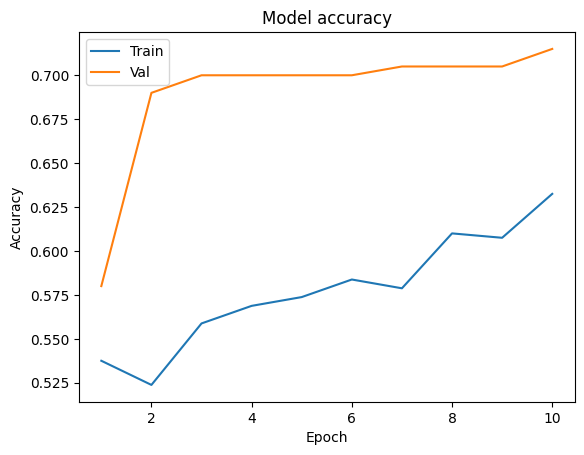

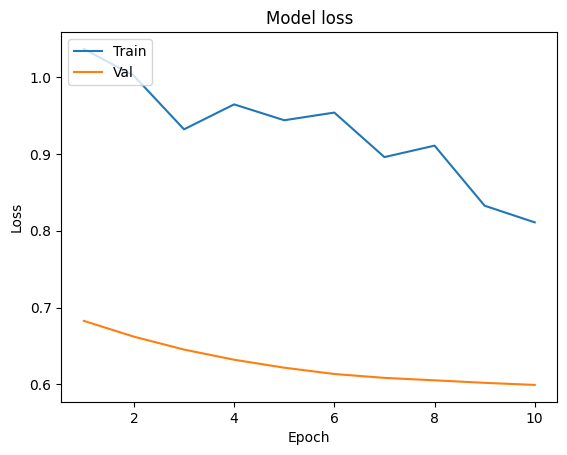

In [ ]:
# Visualizing the graph
plot_learningCurve(history, epochs)

In [ ]:
# We can see that the training accuracy is higher than the validation accuracy.
# So we can say that the model is overfitting. To improve the accuracy, let us add a MaxPool layer and also increase the number of epochs.
# Adding a MaxPool layer in a neural network can help in reducing overfitting and improving computational efficiency by reducing the spatial dimensions of the feature maps. It also helps in capturing the most important information from the input.

epochs = 50
model = Sequential()

model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.5892 - loss: 0.9734 - val_accuracy: 0.6850 - val_loss: 0.6633
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5682 - loss: 1.0065 - val_accuracy: 0.6950 - val_loss: 0.6584
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5890 - loss: 1.0348 - val_accuracy: 0.6950 - val_loss: 0.6466
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5738 - loss: 1.0448 - val_accuracy: 0.7000 - val_loss: 0.6363
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 0.9797 - val_accuracy: 0.6950 - val_loss: 0.6295
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5830 - loss: 0.9838 - val_accuracy: 0.7150 - val_loss: 0.6243
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 0.9276 - val_accuracy: 0.7100 - val_loss: 0.6213
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 0.9242 - val_accuracy: 0.7150 - val_loss

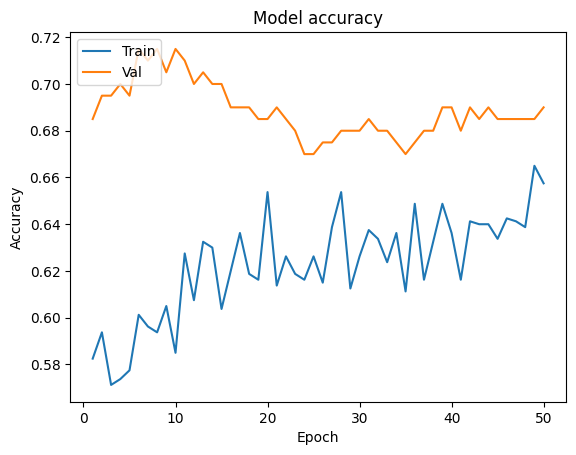

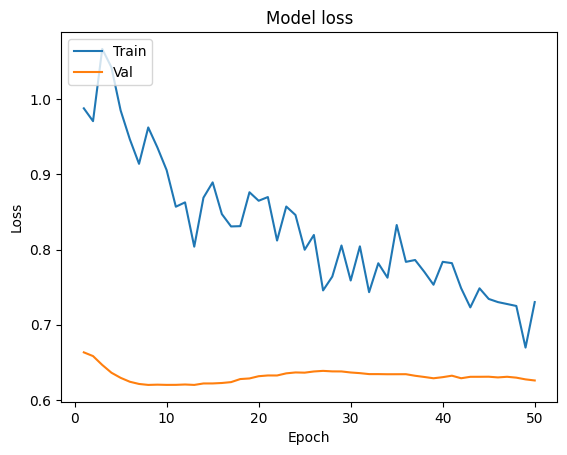

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.690


In [ ]:
print('Training accurancy: ', history.history['accuracy'][-1])
print('Validation accurancy: ', history.history['val_accuracy'][-1])
print('Testing accurancy: ', model.evaluate(X_test, y_test, verbose=0)[1])

Training accurancy:  0.6575000286102295
Validation accurancy:  0.6899999976158142
Testing accurancy:  0.6899999976158142


In [ ]:
# model.predict([])

val = X_train[0]
display(asarray([val]))

display(model.predict(asarray([val])))
display(argmax(model.predict(asarray([val]))))

array([[[ 0.75421451],
        [-0.37930504],
        [ 0.92594839],
        [ 1.04526862],
        [ 0.02198782],
        [ 1.01522017],
        [-0.4445276 ]]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0.33024085]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


0